# Convolutional Sparse Coding
*** Author: Thomas Rolland ***

Ref: https://www.cv-foundation.org/openaccess/content_cvpr_2013/papers/Bristow_Fast_Convolutional_Sparse_2013_CVPR_paper.pdf

```
Sparse coding has become an increasingly popular
method in learning and vision for a variety of classification,
reconstruction and coding tasks. The canonical
approach intrinsically assumes independence between
observations during learning. For many natural signals
however, sparse coding is applied to sub-elements
( i.e. patches) of the signal, where such an assumption
is invalid. Convolutional sparse coding explicitly models
local interactions through the convolution operator,
however the resulting optimization problem is considerably
more complex than traditional sparse coding. In
this paper, we draw upon ideas from signal processing
and Augmented Lagrange Methods (ALMs) to produce
a fast algorithm with globally optimal subproblems and
super-linear convergence
```

For our tests we'll use Sporco, a python toolbox; you have good examples on the sporco toolbox here: https://sporco.readthedocs.io/en/latest/

If you have any question, send me an email at: trolland@protonmail.ch


In [19]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np
import matplotlib.pyplot as plt
from sporco import plot

# dictionary learning
from sporco.admm import cbpdndl
from sporco import util
import sporco.metric as sm
# Sparse coding
from sporco.admm import cbpdn
# dataset
from tensorflow.examples.tutorials.mnist import input_data

### Load data

In [8]:
# Load dataset
mnist = input_data.read_data_sets('MNIST_DATA',one_hot=True)
digits = mnist.train.images[:200].reshape(200,28,28)

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


### Dictionary step

In [9]:
# Initial ditionary
D0 = np.random.randn(8,8,64)

# Dictionary learning parameters
lmbda = 0.5
opt = cbpdndl.ConvBPDNDictLearn.Options({'Verbose': True, 'MaxMainIter': 200,
                            'CBPDN': {'rho': 50.0*lmbda + 0.5},
                            'CCMOD': {'rho': 10.0, 'ZeroMean': True}},
                            method='cns')
# Dictionary learning computation
d = cbpdndl.ConvBPDNDictLearn(D0, digits, lmbda, opt, method='cns')
D = d.solve()

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D       
--------------------------------------------------------------------------------------------------------
   0  1.37e+04  3.51e+03  2.03e+04  6.48e-07  9.66e-01  7.44e-02  2.55e+01  2.74e-01  9.76e-02  1.00e+01
   1  1.02e+04  5.92e+03  8.54e+03  7.69e-07  6.31e-01  2.22e-01  2.55e+01  2.71e-01  1.35e-01  1.00e+01
   2  9.39e+03  5.81e+03  7.16e+03  7.56e-07  2.57e-01  2.89e-01  2.55e+01  1.61e-01  1.08e-01  1.00e+01
   3  9.81e+03  4.93e+03  9.75e+03  8.78e-07  1.68e-01  1.97e-01  2.55e+01  1.35e-01  7.65e-02  1.00e+01
   4  8.75e+03  4.38e+03  8.74e+03  7.82e-07  1.13e-01  1.49e-01  2.55e+01  1.37e-01  5.52e-02  1.00e+01
   5  7.85e+03  4.18e+03  7.33e+03  7.92e-07  8.58e-02  1.29e-01  2.55e+01  1.32e-01  4.24e-02  1.00e+01
   6  7.50e+03  4.14e+03  6.72e+03  8.03e-07  7.16e-02  1.04e-01  2.55e+01  1.19e-01  3.42e-02  1.00e+01
   7  7.27e+03  4.14e+03  6.26e+03  8.93e-07  5.87e-0

  77  6.19e+03  3.71e+03  4.96e+03  7.64e-07  4.67e-03  2.01e-02  2.55e+01  2.89e-02  1.14e-03  1.00e+01
  78  6.18e+03  3.70e+03  4.96e+03  7.89e-07  4.61e-03  1.99e-02  2.55e+01  2.87e-02  1.12e-03  1.00e+01
  79  6.18e+03  3.70e+03  4.95e+03  7.42e-07  4.56e-03  1.97e-02  2.55e+01  2.85e-02  1.11e-03  1.00e+01
  80  6.18e+03  3.70e+03  4.95e+03  7.28e-07  4.50e-03  1.95e-02  2.55e+01  2.84e-02  1.09e-03  1.00e+01
  81  6.17e+03  3.70e+03  4.95e+03  7.84e-07  4.45e-03  1.94e-02  2.55e+01  2.82e-02  1.07e-03  1.00e+01
  82  6.17e+03  3.70e+03  4.95e+03  7.44e-07  4.40e-03  1.92e-02  2.55e+01  2.81e-02  1.05e-03  1.00e+01
  83  6.17e+03  3.70e+03  4.95e+03  7.59e-07  4.35e-03  1.91e-02  2.55e+01  2.80e-02  1.04e-03  1.00e+01
  84  6.17e+03  3.69e+03  4.94e+03  7.85e-07  4.31e-03  1.89e-02  2.55e+01  2.78e-02  1.02e-03  1.00e+01
  85  6.16e+03  3.69e+03  4.94e+03  7.50e-07  4.27e-03  1.88e-02  2.55e+01  2.77e-02  1.01e-03  1.00e+01
  86  6.16e+03  3.69e+03  4.94e+03  8.85e-07  4.23e-03 

 156  6.03e+03  3.61e+03  4.84e+03  8.15e-07  2.81e-03  1.37e-02  2.55e+01  2.17e-02  4.95e-04  1.00e+01
 157  6.03e+03  3.61e+03  4.84e+03  8.21e-07  2.80e-03  1.37e-02  2.55e+01  2.16e-02  4.91e-04  1.00e+01
 158  6.03e+03  3.61e+03  4.84e+03  7.43e-07  2.78e-03  1.37e-02  2.55e+01  2.15e-02  4.87e-04  1.00e+01
 159  6.03e+03  3.61e+03  4.84e+03  8.00e-07  2.77e-03  1.36e-02  2.55e+01  2.13e-02  4.84e-04  1.00e+01
 160  6.03e+03  3.61e+03  4.84e+03  8.31e-07  2.76e-03  1.36e-02  2.55e+01  2.12e-02  4.80e-04  1.00e+01
 161  6.03e+03  3.61e+03  4.84e+03  7.75e-07  2.75e-03  1.35e-02  2.55e+01  2.11e-02  4.76e-04  1.00e+01
 162  6.03e+03  3.61e+03  4.84e+03  7.12e-07  2.74e-03  1.35e-02  2.55e+01  2.09e-02  4.73e-04  1.00e+01
 163  6.02e+03  3.61e+03  4.83e+03  9.46e-07  2.73e-03  1.34e-02  2.55e+01  2.08e-02  4.69e-04  1.00e+01
 164  6.02e+03  3.61e+03  4.83e+03  7.38e-07  2.72e-03  1.34e-02  2.55e+01  2.07e-02  4.66e-04  1.00e+01
 165  6.02e+03  3.61e+03  4.83e+03  7.87e-07  2.70e-03 

Display result of dictionary learning step

/home/trolland/.local/lib/python3.5/site-packages/sporco/plot.py:285: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(img.dtype, np.float):


<Figure size 1008x504 with 0 Axes>

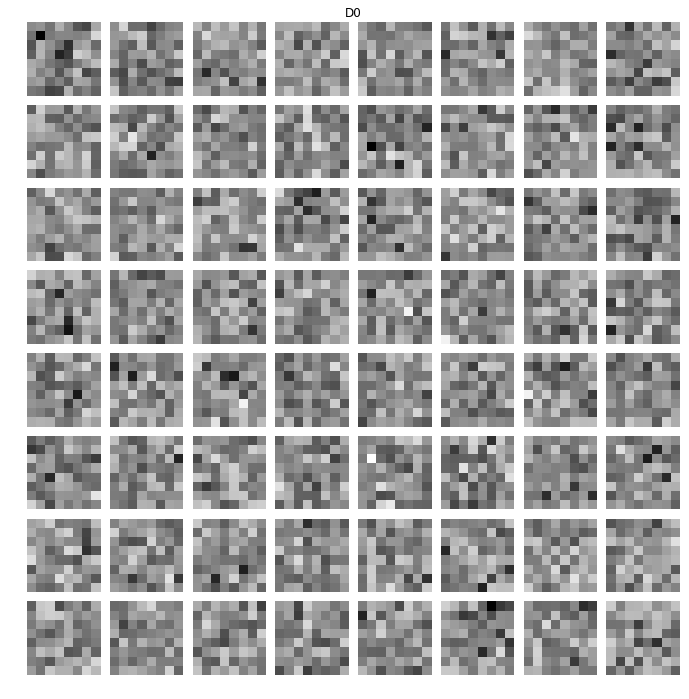

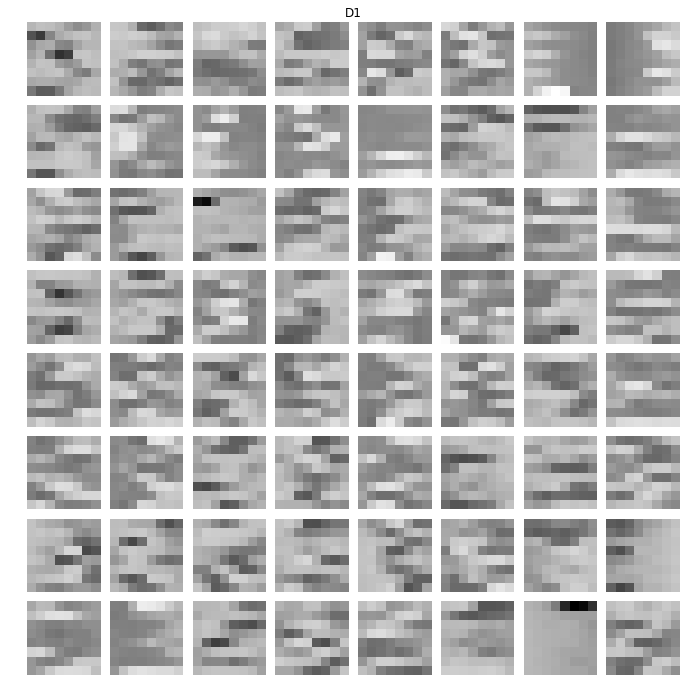

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f34c1ab5128>)

In [33]:
D1 = D.squeeze()
plot.figure(figsize=(14, 7))
plot.imview(util.tiledict(D0), title='D0')
plot.imview(util.tiledict(D1), title='D1')

<Figure size 1440x360 with 0 Axes>

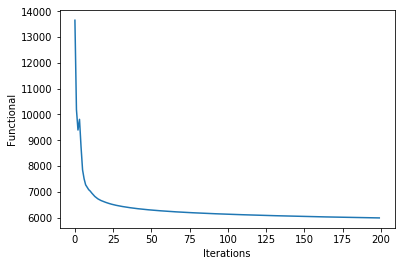

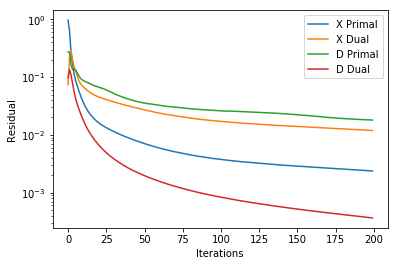

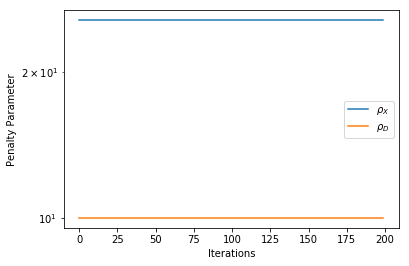

/home/trolland/.local/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [30]:
its = d.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional')
plot.plot(np.vstack((its.XPrRsdl, its.XDlRsdl, its.DPrRsdl,
          its.DDlRsdl)).T, ptyp='semilogy', xlbl='Iterations',
          ylbl='Residual', lgnd=['X Primal', 'X Dual', 'D Primal', 'D Dual'])
plot.plot(np.vstack((its.XRho, its.DRho)).T, xlbl='Iterations',
          ylbl='Penalty Parameter', ptyp='semilogy',
          lgnd=['$\\rho_X$', '$\\rho_D$'])
fig.show()

### Sparse Coding step

In [31]:
lmbda = 5e-2
opt = cbpdn.ConvBPDN.Options({'Verbose': True, 'MaxMainIter': 200,
                              'RelStopTol': 5e-3, 'AuxVarObj': False})

In [32]:
b = cbpdn.ConvBPDN(D, digits, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     r         s         ρ         
----------------------------------------------------------------
   0  3.78e+03  2.67e+03  2.23e+04  8.25e-01  2.56e-01  3.50e+00
   1  3.57e+03  2.78e+03  1.58e+04  3.90e-01  5.56e-01  3.50e+00
   2  4.02e+03  2.71e+03  2.62e+04  3.06e-01  3.91e-01  2.46e+00
   3  3.76e+03  2.67e+03  2.18e+04  2.67e-01  2.77e-01  1.83e+00
   4  3.61e+03  2.67e+03  1.87e+04  2.56e-01  1.91e-01  1.51e+00
   5  3.53e+03  2.68e+03  1.70e+04  2.03e-01  1.23e-01  1.51e+00
   6  3.43e+03  2.69e+03  1.50e+04  1.51e-01  1.11e-01  1.51e+00
   7  3.41e+03  2.68e+03  1.45e+04  1.15e-01  1.03e-01  1.51e+00
   8  3.43e+03  2.68e+03  1.50e+04  1.01e-01  8.76e-02  1.34e+00
   9  3.38e+03  2.68e+03  1.41e+04  9.01e-02  7.68e-02  1.21e+00
  10  3.37e+03  2.67e+03  1.39e+04  8.08e-02  7.00e-02  1.10e+00
  11  3.33e+03  2.67e+03  1.31e+04  7.39e-02  6.16e-02  9.95e-01
  12  3.30e+03  2.68e+03  1.25e+04  6.26e-02  5.31e-02  9.95e-01
  13  3.29e+03  2.68e+0

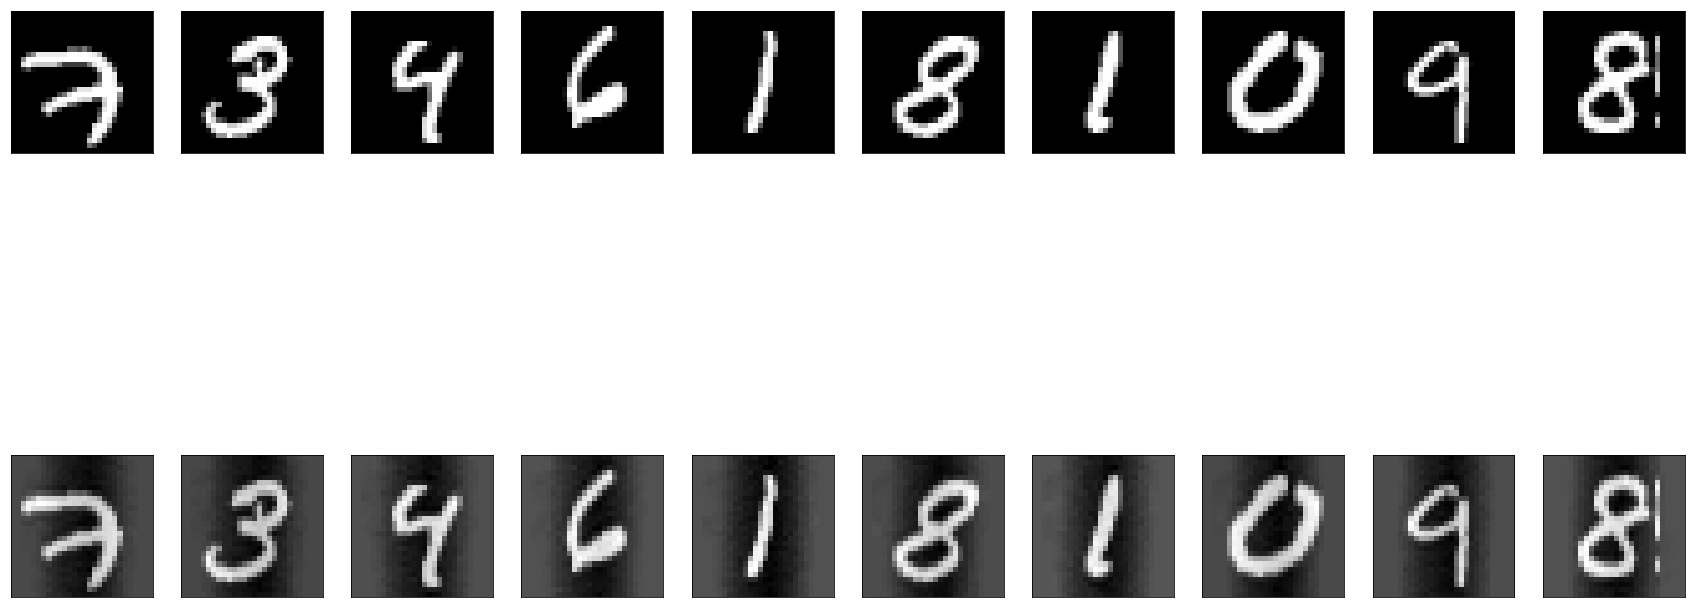

In [34]:
recons = b.reconstruct()


plt.figure(figsize=(30,15))

n_show = 10 #  number of image that we show
for i in range(n_show):
    # display original
    ax = plt.subplot(2,n_show,i+1)
    plt.imshow(digits[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2,n_show,i+1+n_show)
    plt.imshow(recons[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
     
plt.show()